In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
data =  pd.read_csv(r"D:\Downloads\deposit\data.csv", sep=';', parse_dates=['REPORTDATE'], dayfirst=True)
data.head()

,REPORTDATE,VALUE
0,2013-12-30,3457625638
1,2013-12-31,3417092149
2,2014-01-01,3417092149
3,2014-01-02,3417092149
4,2014-01-03,3417092149


In [85]:
print(f"Доступный временной диапазон: {data.shape[0]} дней (или {round(data.shape[0] / 365, 1)} лет).")

Доступный временной диапазон: 2111 дней (или 5.8 лет).


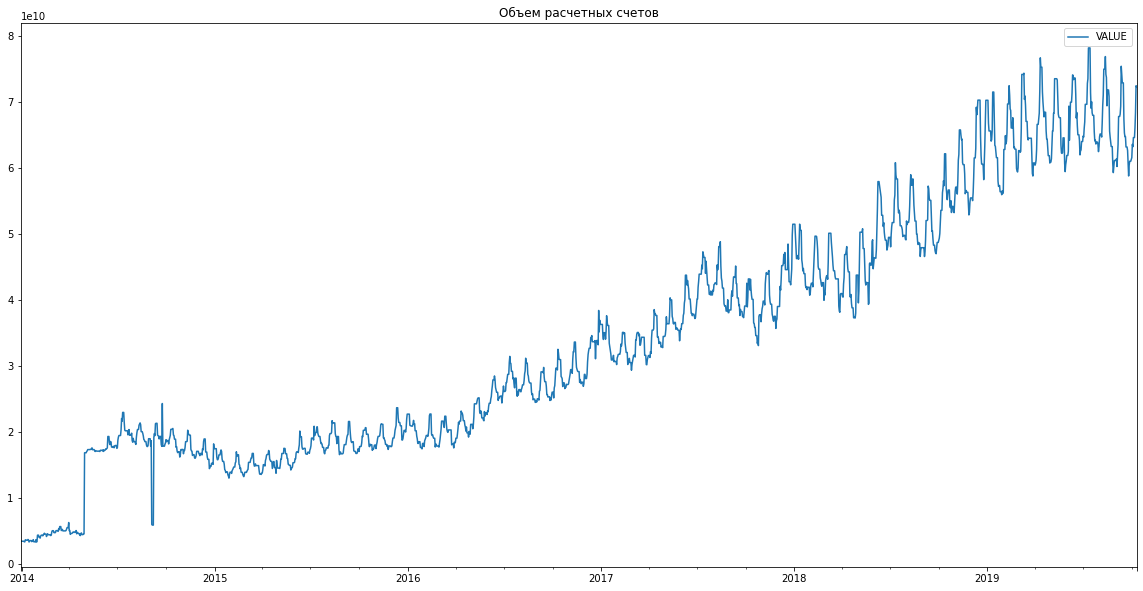

In [102]:
data.plot("REPORTDATE", "VALUE", figsize=(20, 10), xlabel='', title='Объем расчетных счетов');

Выводы по графику:
1. График имеет восходящий тренд (т.е. не является стационарным): объем расчетных счетов растет (можно попробовать аппроксимировать линейной функцией).
2. Имеется сезонность - мультипликативная (судя по виду - месячная)
3. Необходимо исключить из рассмотрения период до начала 2015 года, поскольку характер ряда на ранних этапах достаточно сильно менялся, а также имелись выбросы).

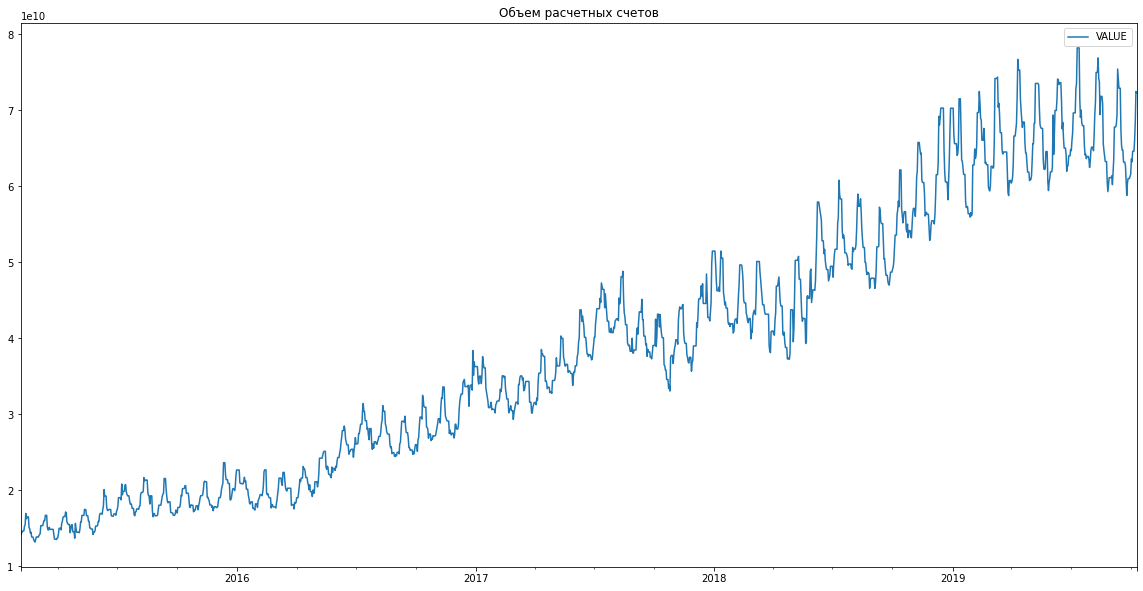

In [111]:
# Отбросим начальные значения временного ряда (до начала 2015 года)
data2 = data.iloc[400:]
data2.plot("REPORTDATE", "VALUE", figsize=(20, 10), xlabel='', title='Объем расчетных счетов');

In [123]:
data2.set_index('REPORTDATE', inplace=True)
data2.head()

,VALUE
REPORTDATE,
2015-02-03,14129552979
2015-02-04,14267477784
2015-02-05,14488396492
2015-02-06,14665134556
2015-02-07,14665134556


Для разложения временного ряда по мультипликативной модели, задаваемой формулой:
$ y(t) = Level(t) * Trend(t) * Seasonality(t) * Noise(t) $,
усредним данные по месяцам:

In [132]:
data3 = data2.resample('M').mean()

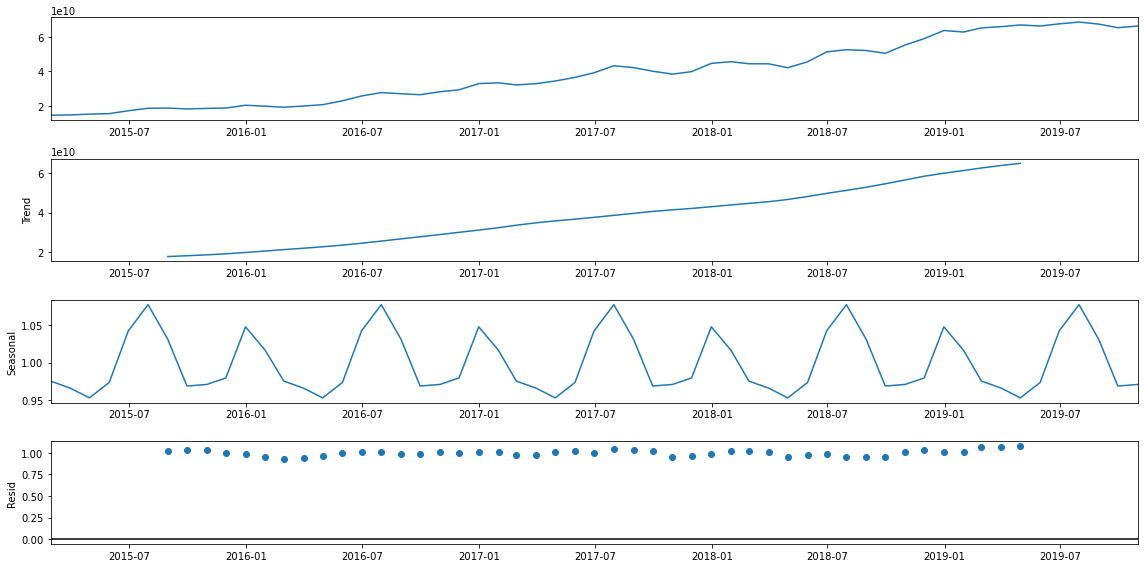

In [141]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data3, model='multiplicative')
fig = decomposition.plot()
plt.rcParams["figure.figsize"] = (12, 8)

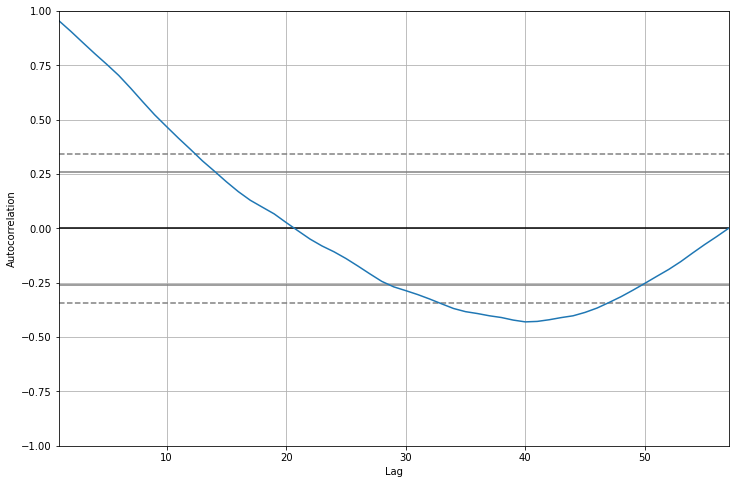

In [142]:
AutoCorr = pd.plotting.autocorrelation_plot(data3['VALUE'])
plt.show()

Построим простую модель - скользящее среднее.
$ y(t) = \cfrac{1}{k} * \sum_{n=0}^{k-1}y_{t-n}$
Напишем функцию для

In [160]:
def plot_rolling_mean(dataset, series, n):

    """
    dataset - датафрейм, содержащий временной ряд
    series - временной ряд
    n - размер скользящего окна
    """

    rolling_mean = series.rolling(window=n).mean()

    # Доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_boundary = rolling_mean + 1.96 * rolling_std
    lower_boundary = rolling_mean - 1.96 * rolling_std

    plt.figure(figsize=(20, 10))
    plt.title(f"Скользящее среднее\n размер окна = {n}")
    plt.plot(rolling_mean, "g", label="Тренд скользящего среднего")
    plt.plot(upper_boundary, "r--", label="Верх. гр. дов. инт / Нижн. гр. дов. инт.")
    plt.plot(lower_boundary, "r--")
    plt.plot(dataset[n:], label="Фактические значения")
    plt.legend(loc="upper left")
    plt.grid(True)

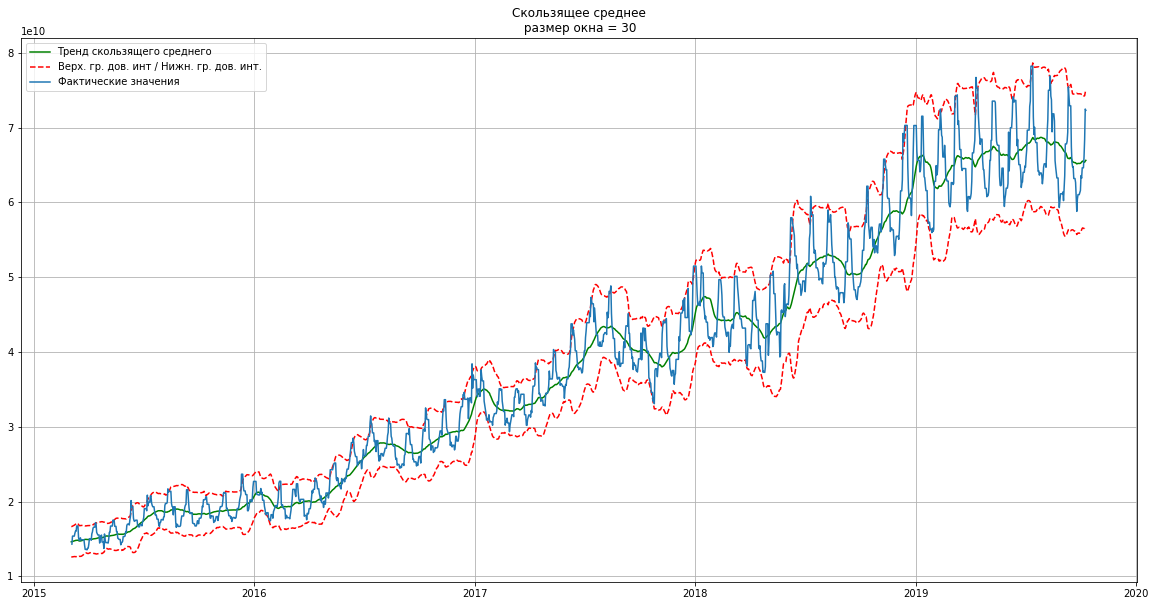

In [161]:
# Построим тренд, сглаженный по месяцам
plot_rolling_mean(data2, data2.VALUE, 30)